In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

2024-09-25 11:18:10.149176: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-25 11:18:10.378618: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-25 11:18:11.605428: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-25 11:18:14.779042: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
base = pd.read_csv('bases/petr4_treinamento.csv')
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [3]:
base.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [4]:
base = base.dropna()

In [5]:
base.shape

(1242, 7)

In [6]:
base_train = base.iloc[:, 1:2].values
base_train

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [15.99    ],
       [16.1     ],
       [16.1     ]])

In [7]:
normalizator = MinMaxScaler(feature_range=(0, 1))
base_train_normalized = normalizator.fit_transform(base_train)
base_train_normalized   

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [8]:
x = [] # Previsores
y = [] # Preços reais
for i in range(90, 1242): # 90 preços anteriores para prever intervalo atual
    x.append(base_train_normalized[i - 90:i, 0])
    y.append(base_train_normalized[i, 0])

x, y = np.array(x), np.array(y)

In [9]:
x.shape, y.shape

((1152, 90), (1152,))

## **Rede Neural**

In [13]:
model = Sequential()

model.add(Input((x.shape[1], 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='linear'))

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 90, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 90, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 90, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 90, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [16]:
model.fit(x, y, epochs=100, batch_size=32)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 34s 494ms/step - loss: 0.0593 - mean_absolute_error: 0.1774
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 405ms/step - loss: 0.0170 - mean_absolute_error: 0.1044
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 19s 375ms/step - loss: 0.0128 - mean_absolute_error: 0.0882
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 284ms/step - loss: 0.0114 - mean_absolute_error: 0.0832
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 326ms/step - loss: 0.0112 - mean_absolute_error: 0.0834
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 312ms/step - loss: 0.0091 - mean_absolute_error: 0.0715
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 238ms/step - loss: 0.0083 - mean_absolute_error: 0.0691
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 211ms/step - loss: 0.0096 - mean_absolute_error: 0.0752
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/step - loss: 0.0078 - mean_absolute_error: 0.0662
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 242ms/step - loss: 0.0069 - mean_absolute_error: 0.0642
Epoch 11/10

In [8]:
base_test = pd.read_csv('bases/petr4_teste.csv')
base_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000
5,2018-01-09,17.030001,17.160000,16.959999,17.030001,16.996010,35070900
6,2018-01-10,16.920000,17.049999,16.770000,16.799999,16.766466,28547700
7,2018-01-11,16.879999,17.299999,16.840000,17.250000,17.215569,37921500
8,2018-01-12,17.040001,17.410000,17.020000,17.299999,17.265469,45912100
9,2018-01-15,17.320000,17.440001,17.150000,17.350000,17.315371,28945400


In [9]:
base_test.shape

(22, 7)

In [19]:
y_test = base_test.iloc[:, 1:2].values
y_test

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [10]:
base_complete = pd.concat((base['Open'], base_test['Open']), axis=0)
base_complete.shape

(1264,)

In [22]:
base_complete

0     19.990000
1     19.809999
2     20.330000
3     20.480000
4     20.110001
        ...    
17    19.340000
18    19.620001
19    19.670000
20    19.770000
21    19.740000
Name: Open, Length: 1264, dtype: float64

In [54]:
inputs = base_complete[len(base_complete) - len(base_test) - 90:].values
inputs

array([13.93    , 13.76    , 13.79    , 13.53    , 13.85    , 13.96    ,
       14.57    , 14.65    , 15.02    , 15.1     , 14.88    , 14.98    ,
       14.94    , 15.03    , 15.07    , 15.02    , 15.1     , 15.25    ,
       15.85    , 15.6     , 15.79    , 15.86    , 15.7     , 15.37    ,
       15.5     , 15.19    , 15.6     , 15.9     , 15.88    , 15.66    ,
       15.61    , 16.129999, 16.17    , 16.08    , 16.23    , 16.16    ,
       16.139999, 16.219999, 16.      , 16.190001, 16.290001, 16.290001,
       16.530001, 16.780001, 16.77    , 16.969999, 16.9     , 16.99    ,
       16.9     , 16.959999, 17.049999, 17.309999, 16.690001, 16.889999,
       16.709999, 16.690001, 16.639999, 15.35    , 15.62    , 15.92    ,
       16.02    , 16.15    , 16.09    , 15.98    , 16.25    , 16.01    ,
       15.93    , 15.87    , 15.3     , 15.34    , 15.65    , 15.5     ,
       15.22    , 15.3     , 15.51    , 15.48    , 15.36    , 15.65    ,
       15.1     , 15.05    , 15.16    , 15.18    , 

In [55]:
inputs = inputs.reshape(-1, 1)
inputs.shape

(112, 1)

In [56]:
inputs = normalizator.transform(inputs)
inputs

array([[0.47141473],
       [0.46317829],
       [0.46463178],
       [0.45203488],
       [0.46753876],
       [0.47286822],
       [0.50242248],
       [0.50629845],
       [0.52422481],
       [0.52810078],
       [0.51744186],
       [0.52228682],
       [0.52034884],
       [0.5247093 ],
       [0.52664729],
       [0.52422481],
       [0.52810078],
       [0.53536822],
       [0.56443798],
       [0.55232558],
       [0.56153101],
       [0.56492248],
       [0.55717054],
       [0.54118217],
       [0.54748062],
       [0.53246124],
       [0.55232558],
       [0.56686047],
       [0.56589147],
       [0.55523256],
       [0.55281008],
       [0.57800383],
       [0.57994186],
       [0.5755814 ],
       [0.58284884],
       [0.57945736],
       [0.57848832],
       [0.58236429],
       [0.57170543],
       [0.5809109 ],
       [0.58575586],
       [0.58575586],
       [0.59738377],
       [0.60949617],
       [0.60901163],
       [0.6187015 ],
       [0.61531008],
       [0.619

In [57]:
inputs.shape

(112, 1)

In [64]:
x_test = [inputs[i - 90:i, 0] for i in range(90, 112)]
x_test

[array([0.47141473, 0.46317829, 0.46463178, 0.45203488, 0.46753876,
        0.47286822, 0.50242248, 0.50629845, 0.52422481, 0.52810078,
        0.51744186, 0.52228682, 0.52034884, 0.5247093 , 0.52664729,
        0.52422481, 0.52810078, 0.53536822, 0.56443798, 0.55232558,
        0.56153101, 0.56492248, 0.55717054, 0.54118217, 0.54748062,
        0.53246124, 0.55232558, 0.56686047, 0.56589147, 0.55523256,
        0.55281008, 0.57800383, 0.57994186, 0.5755814 , 0.58284884,
        0.57945736, 0.57848832, 0.58236429, 0.57170543, 0.5809109 ,
        0.58575586, 0.58575586, 0.59738377, 0.60949617, 0.60901163,
        0.6187015 , 0.61531008, 0.61967054, 0.61531008, 0.61821701,
        0.62257747, 0.63517437, 0.60513571, 0.61482553, 0.6061046 ,
        0.60513571, 0.60271313, 0.54021318, 0.55329457, 0.56782946,
        0.57267442, 0.57897287, 0.57606589, 0.57073643, 0.58381783,
        0.57218992, 0.56831395, 0.56540698, 0.5377907 , 0.53972868,
        0.55474806, 0.54748062, 0.53391473, 0.53

In [67]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(22, 90, 1)

In [68]:
prevs = model.predict(x_test)
prevs

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[0.5562213 ],
       [0.56003374],
       [0.56418735],
       [0.57050204],
       [0.5773717 ],
       [0.5831078 ],
       [0.58857614],
       [0.5928569 ],
       [0.5950654 ],
       [0.59632266],
       [0.5990392 ],
       [0.6033728 ],
       [0.6116525 ],
       [0.6249852 ],
       [0.63976675],
       [0.65163124],
       [0.6593623 ],
       [0.6632254 ],
       [0.66993463],
       [0.6818141 ],
       [0.69604456],
       [0.7091386 ]], dtype=float32)

In [69]:
prevs = normalizator.inverse_transform(prevs)

In [70]:
prevs

array([[15.680408],
       [15.759096],
       [15.844827],
       [15.975162],
       [16.116951],
       [16.235346],
       [16.348211],
       [16.436565],
       [16.48215 ],
       [16.508099],
       [16.564169],
       [16.653614],
       [16.824507],
       [17.099695],
       [17.404785],
       [17.649668],
       [17.809238],
       [17.888971],
       [18.02745 ],
       [18.272642],
       [18.566359],
       [18.83662 ]], dtype=float32)

In [71]:
y_test

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [72]:
prevs.mean()

16.95384

In [73]:
y_test.mean()

17.87454563636364

In [75]:
mean_absolute_error(prevs, y_test)

0.9207032565335361

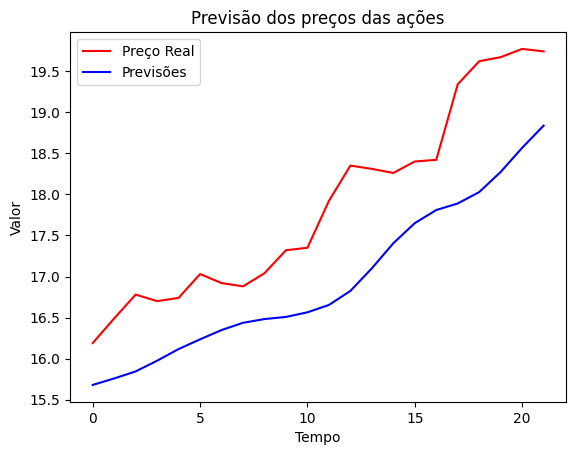

In [80]:
plt.plot(y_test, color='red', label='Preço Real')
plt.plot(prevs, color='blue', label='Previsões')
plt.title('Previsão dos preços das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend();

### **Homework - Previsão da crise**

In [68]:
base_train = pd.read_csv('bases/petr4_treinamento_ex.csv')
base_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1340,2018-05-21,26.100000,26.290001,24.940001,25.049999,25.000000,75971900.0
1341,2018-05-22,24.809999,25.290001,24.150000,24.709999,24.709999,88109900.0
1342,2018-05-23,24.230000,24.480000,23.270000,23.270000,23.270000,74622500.0
1343,2018-05-24,20.049999,20.750000,19.650000,20.080000,20.080000,240343800.0


In [69]:
base_test = pd.read_csv('bases/petr4_teste_ex.csv')
base_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-28,19.200001,19.200001,16.910000,16.910000,16.910000,134504900
1,2018-05-29,18.000000,19.440001,17.600000,19.299999,19.299999,181509800
2,2018-05-30,18.389999,19.969999,18.129999,18.980000,18.980000,125430000
3,2018-06-01,19.559999,19.750000,14.900000,16.160000,16.160000,216954700
4,2018-06-04,17.290001,17.639999,17.049999,17.530001,17.530001,93547600
5,2018-06-05,17.360001,17.799999,16.590000,16.590000,16.590000,67006400
6,2018-06-06,16.469999,16.680000,15.870000,16.330000,16.330000,69496800
7,2018-06-07,16.000000,16.160000,14.930000,15.760000,15.760000,118752700
8,2018-06-08,15.810000,16.190001,15.060000,15.250000,15.250000,91461500
9,2018-06-11,15.500000,15.800000,15.130000,15.410000,15.410000,44872500


In [70]:
base_train.isnull().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [71]:
base_train = base_train.dropna()

In [72]:
base_test.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [73]:
base_train_ = base_train.iloc[:, 1:2].values
base_train_

array([[19.99    ],
       [19.809999],
       [20.33    ],
       ...,
       [24.23    ],
       [20.049999],
       [20.65    ]])

In [74]:
y_test = base_test.iloc[:, 1:2].values
y_test

array([[19.200001],
       [18.      ],
       [18.389999],
       [19.559999],
       [17.290001],
       [17.360001],
       [16.469999],
       [16.      ],
       [15.81    ],
       [15.5     ],
       [15.48    ],
       [15.42    ],
       [15.33    ],
       [15.03    ],
       [14.77    ],
       [14.26    ],
       [15.84    ],
       [16.09    ],
       [15.41    ]])

In [75]:
normalizer = MinMaxScaler(feature_range=(0, 1))
base_train_ = normalizer.fit_transform(base_train_)

In [76]:
antecipators = 90

In [77]:
x_train = [] # Previsores
y_train = [] # Preços reais
for i in range(antecipators, 1242): # 90 preços anteriores para prever intervalo atual
    x_train.append(base_train_[i - antecipators:i, 0])
    y_train.append(base_train_[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [78]:
model = Sequential()

model.add(Input((x_train.shape[1], 1)))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
          
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
          
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))

model.add(Dense(units=1, activation='linear'))

In [79]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 90, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 90, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 90, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 90, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,451 (435.36 KB)

 Trainable params: 111,451 (435.36 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [81]:
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 14s 195ms/step - loss: 0.0442 - mean_absolute_error: 0.1584
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 0.0123 - mean_absolute_error: 0.0880
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0106 - mean_absolute_error: 0.0813
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 166ms/step - loss: 0.0105 - mean_absolute_error: 0.0790
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - loss: 0.0084 - mean_absolute_error: 0.0717
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0099 - mean_absolute_error: 0.0782
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0064 - mean_absolute_error: 0.0621
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0071 - mean_absolute_error: 0.0649
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 0.0070 - mean_absolute_error: 0.0653
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - loss: 0.0061 - mean_absolute_error: 0.0604
Epoch 11/100
36/36

In [82]:
base_complete = pd.concat((base_train['Open'], base_test['Open']), axis=0)
base_complete.shape

(1361,)

In [83]:
inputs = base_complete[len(base_complete) - len(base_test) - 90:].values
inputs

array([17.35    , 17.92    , 18.35    , 18.309999, 18.26    , 18.4     ,
       18.42    , 19.34    , 19.620001, 19.67    , 19.77    , 19.74    ,
       19.76    , 20.299999, 19.65    , 18.66    , 19.969999, 19.549999,
       19.030001, 19.01    , 19.5     , 19.459999, 19.549999, 19.879999,
       20.59    , 20.59    , 20.950001, 21.4     , 21.469999, 21.629999,
       21.4     , 20.700001, 21.49    , 22.5     , 21.690001, 21.85    ,
       21.780001, 22.540001, 22.450001, 22.299999, 22.049999, 21.469999,
       21.27    , 21.18    , 21.25    , 21.860001, 21.610001, 22.07    ,
       22.139999, 21.26    , 21.26    , 21.360001, 21.110001, 20.309999,
       21.15    , 20.98    , 21.43    , 20.91    , 21.35    , 21.790001,
       21.639999, 21.049999, 20.700001, 21.35    , 22.07    , 22.059999,
       22.09    , 22.6     , 22.01    , 22.      , 22.84    , 22.73    ,
       22.67    , 22.540001, 22.450001, 22.57    , 23.059999, 23.299999,
       25.139999, 25.83    , 25.85    , 26.35    , 

In [84]:
inputs = inputs.reshape(-1, 1)
inputs.shape

(109, 1)

In [85]:
normalizer.inverse_transform()

<bound method MinMaxScaler.inverse_transform of MinMaxScaler()>

In [86]:
normalizer.transform(inputs)

array([[0.56803456],
       [0.59265659],
       [0.6112311 ],
       [0.6095032 ],
       [0.60734341],
       [0.61339093],
       [0.61425486],
       [0.65399568],
       [0.66609076],
       [0.66825054],
       [0.67257019],
       [0.6712743 ],
       [0.67213823],
       [0.69546432],
       [0.66738661],
       [0.62462203],
       [0.68120946],
       [0.66306691],
       [0.64060479],
       [0.63974082],
       [0.66090713],
       [0.65917922],
       [0.66306691],
       [0.67732177],
       [0.70799136],
       [0.70799136],
       [0.72354216],
       [0.74298056],
       [0.74600428],
       [0.75291572],
       [0.74298056],
       [0.71274302],
       [0.74686825],
       [0.79049676],
       [0.7555076 ],
       [0.76241901],
       [0.75939529],
       [0.79222467],
       [0.78833698],
       [0.78185741],
       [0.77105827],
       [0.74600428],
       [0.73736501],
       [0.73347732],
       [0.73650108],
       [0.76285102],
       [0.75205188],
       [0.771

In [87]:
inputs = normalizer.transform(inputs)
inputs

array([[0.56803456],
       [0.59265659],
       [0.6112311 ],
       [0.6095032 ],
       [0.60734341],
       [0.61339093],
       [0.61425486],
       [0.65399568],
       [0.66609076],
       [0.66825054],
       [0.67257019],
       [0.6712743 ],
       [0.67213823],
       [0.69546432],
       [0.66738661],
       [0.62462203],
       [0.68120946],
       [0.66306691],
       [0.64060479],
       [0.63974082],
       [0.66090713],
       [0.65917922],
       [0.66306691],
       [0.67732177],
       [0.70799136],
       [0.70799136],
       [0.72354216],
       [0.74298056],
       [0.74600428],
       [0.75291572],
       [0.74298056],
       [0.71274302],
       [0.74686825],
       [0.79049676],
       [0.7555076 ],
       [0.76241901],
       [0.75939529],
       [0.79222467],
       [0.78833698],
       [0.78185741],
       [0.77105827],
       [0.74600428],
       [0.73736501],
       [0.73347732],
       [0.73650108],
       [0.76285102],
       [0.75205188],
       [0.771

In [88]:
x_test = [inputs[i - antecipators:i, 0] for i in range(antecipators, inputs.shape[0])]
x_test

[array([0.56803456, 0.59265659, 0.6112311 , 0.6095032 , 0.60734341,
        0.61339093, 0.61425486, 0.65399568, 0.66609076, 0.66825054,
        0.67257019, 0.6712743 , 0.67213823, 0.69546432, 0.66738661,
        0.62462203, 0.68120946, 0.66306691, 0.64060479, 0.63974082,
        0.66090713, 0.65917922, 0.66306691, 0.67732177, 0.70799136,
        0.70799136, 0.72354216, 0.74298056, 0.74600428, 0.75291572,
        0.74298056, 0.71274302, 0.74686825, 0.79049676, 0.7555076 ,
        0.76241901, 0.75939529, 0.79222467, 0.78833698, 0.78185741,
        0.77105827, 0.74600428, 0.73736501, 0.73347732, 0.73650108,
        0.76285102, 0.75205188, 0.77192225, 0.77494596, 0.73693305,
        0.73693305, 0.74125274, 0.73045361, 0.69589629, 0.73218143,
        0.72483801, 0.74427646, 0.72181425, 0.74082073, 0.75982726,
        0.75334769, 0.72786173, 0.71274302, 0.74082073, 0.77192225,
        0.77149024, 0.77278618, 0.79481641, 0.76933045, 0.76889849,
        0.80518359, 0.80043197, 0.79784017, 0.79

In [89]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(19, 90, 1)

In [90]:
prevs = model.predict(x_test)
prevs

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step


array([[0.763929  ],
       [0.70299685],
       [0.64367366],
       [0.5958139 ],
       [0.5708591 ],
       [0.55938023],
       [0.5539285 ],
       [0.54718673],
       [0.5358175 ],
       [0.52090424],
       [0.5045923 ],
       [0.4898333 ],
       [0.47859764],
       [0.4712196 ],
       [0.46591613],
       [0.46057487],
       [0.45264605],
       [0.44985083],
       [0.4558906 ]], dtype=float32)

In [95]:
prevs = normalizer.inverse_transform(prevs)
prevs

array([[21.884956 ],
       [20.474379 ],
       [19.101046 ],
       [17.993092 ],
       [17.415388 ],
       [17.149652 ],
       [17.023445 ],
       [16.867373 ],
       [16.604176 ],
       [16.258934 ],
       [15.881312 ],
       [15.539641 ],
       [15.279536 ],
       [15.108734 ],
       [14.985958 ],
       [14.8623085],
       [14.678756 ],
       [14.614046 ],
       [14.753868 ]], dtype=float32)

In [96]:
prevs.mean(), y_test.mean()

(16.656662, 16.379473684210524)

In [97]:
mean_absolute_error(prevs, y_test)

0.816247373882093

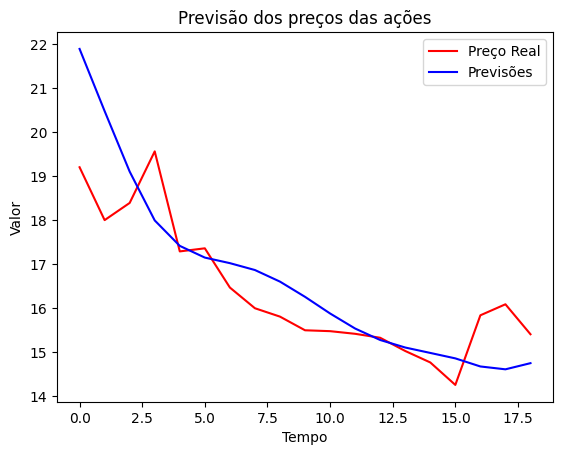

In [98]:
plt.plot(y_test, color='red', label='Preço Real')
plt.plot(prevs, color='blue', label='Previsões')
plt.title('Previsão dos preços das ações')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend();